c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


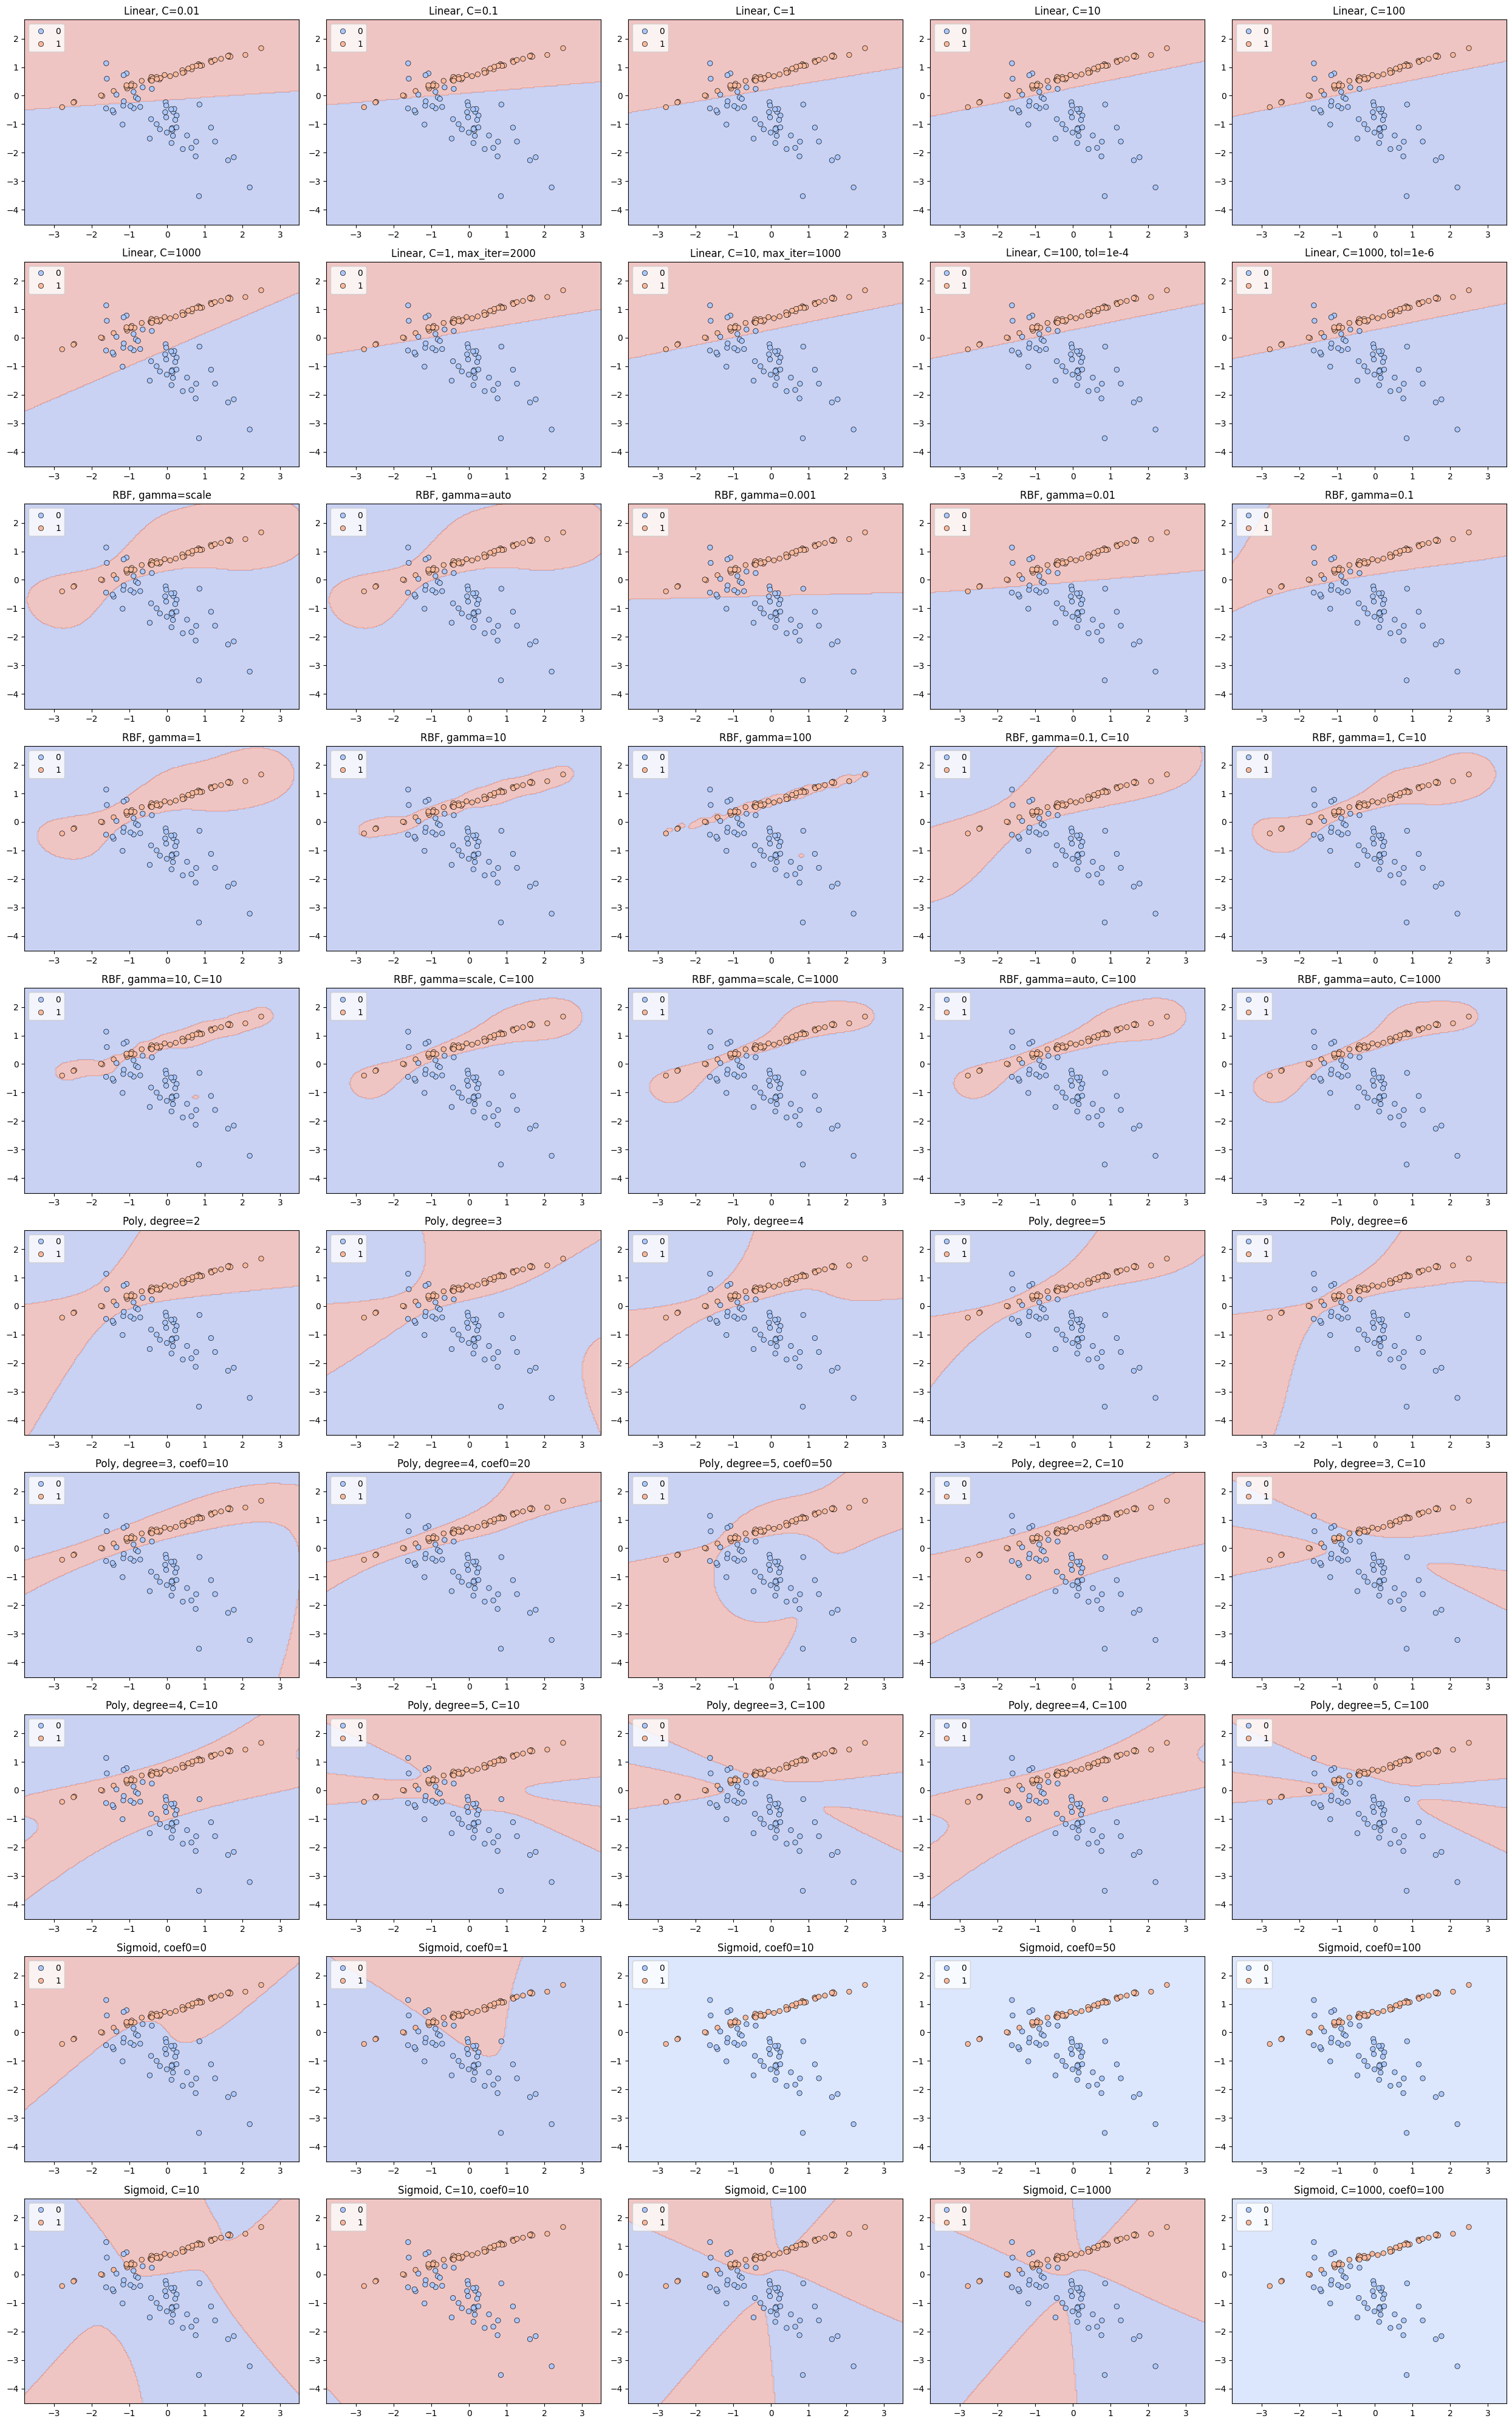

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define 50 different SVM configurations
svm_configs = [
    # Linear Kernel (10 variations)
    ('Linear, C=0.01', svm.SVC(kernel='linear', C=0.01)),
    ('Linear, C=0.1', svm.SVC(kernel='linear', C=0.1)),
    ('Linear, C=1', svm.SVC(kernel='linear', C=1)),
    ('Linear, C=10', svm.SVC(kernel='linear', C=10)),
    ('Linear, C=100', svm.SVC(kernel='linear', C=100, shrinking=False)),
    ('Linear, C=1000', svm.SVC(kernel='linear', C=1000, tol=1e-5, max_iter=5000)),
    ('Linear, C=1, max_iter=2000', svm.SVC(kernel='linear', C=1, max_iter=2000)),
    ('Linear, C=10, max_iter=1000', svm.SVC(kernel='linear', C=10, max_iter=1000)),
    ('Linear, C=100, tol=1e-4', svm.SVC(kernel='linear', C=100, tol=1e-4)),
    ('Linear, C=1000, tol=1e-6', svm.SVC(kernel='linear', C=1000, tol=1e-6)),

    # RBF Kernel (15 variations)
    ('RBF, gamma=scale', svm.SVC(kernel='rbf', gamma='scale', C=1, probability=True)),
    ('RBF, gamma=auto', svm.SVC(kernel='rbf', gamma='auto', C=1)),
    ('RBF, gamma=0.001', svm.SVC(kernel='rbf', gamma=0.001, C=1)),
    ('RBF, gamma=0.01', svm.SVC(kernel='rbf', gamma=0.01, C=1)),
    ('RBF, gamma=0.1', svm.SVC(kernel='rbf', gamma=0.1, C=1)),
    ('RBF, gamma=1', svm.SVC(kernel='rbf', gamma=1, C=1)),
    ('RBF, gamma=10', svm.SVC(kernel='rbf', gamma=10, C=1)),
    ('RBF, gamma=100', svm.SVC(kernel='rbf', gamma=100, C=1)),
    ('RBF, gamma=0.1, C=10', svm.SVC(kernel='rbf', gamma=0.1, C=10)),
    ('RBF, gamma=1, C=10', svm.SVC(kernel='rbf', gamma=1, C=10)),
    ('RBF, gamma=10, C=10', svm.SVC(kernel='rbf', gamma=10, C=10)),
    ('RBF, gamma=scale, C=100', svm.SVC(kernel='rbf', gamma='scale', C=100)),
    ('RBF, gamma=scale, C=1000', svm.SVC(kernel='rbf', gamma='scale', C=1000)),
    ('RBF, gamma=auto, C=100', svm.SVC(kernel='rbf', gamma='auto', C=100)),
    ('RBF, gamma=auto, C=1000', svm.SVC(kernel='rbf', gamma='auto', C=1000)),

    # Polynomial Kernel (15 variations)
    ('Poly, degree=2', svm.SVC(kernel='poly', degree=2, C=1, coef0=0.5)),
    ('Poly, degree=3', svm.SVC(kernel='poly', degree=3, C=1, coef0=0.5)),
    ('Poly, degree=4', svm.SVC(kernel='poly', degree=4, C=1, coef0=0.5)),
    ('Poly, degree=5', svm.SVC(kernel='poly', degree=5, C=1, coef0=1.0)),
    ('Poly, degree=6', svm.SVC(kernel='poly', degree=6, C=1, coef0=1.0)),
    ('Poly, degree=3, coef0=10', svm.SVC(kernel='poly', degree=3, C=1, coef0=10)),
    ('Poly, degree=4, coef0=20', svm.SVC(kernel='poly', degree=4, C=1, coef0=20)),
    ('Poly, degree=5, coef0=50', svm.SVC(kernel='poly', degree=5, C=1, coef0=50)),
    ('Poly, degree=2, C=10', svm.SVC(kernel='poly', degree=2, C=10)),
    ('Poly, degree=3, C=10', svm.SVC(kernel='poly', degree=3, C=10)),
    ('Poly, degree=4, C=10', svm.SVC(kernel='poly', degree=4, C=10)),
    ('Poly, degree=5, C=10', svm.SVC(kernel='poly', degree=5, C=10)),
    ('Poly, degree=3, C=100', svm.SVC(kernel='poly', degree=3, C=100)),
    ('Poly, degree=4, C=100', svm.SVC(kernel='poly', degree=4, C=100)),
    ('Poly, degree=5, C=100', svm.SVC(kernel='poly', degree=5, C=100)),

    # Sigmoid Kernel (10 variations)
    ('Sigmoid, coef0=0', svm.SVC(kernel='sigmoid', C=1, coef0=0, probability=True)),
    ('Sigmoid, coef0=1', svm.SVC(kernel='sigmoid', C=1, coef0=1)),
    ('Sigmoid, coef0=10', svm.SVC(kernel='sigmoid', C=1, coef0=10)),
    ('Sigmoid, coef0=50', svm.SVC(kernel='sigmoid', C=1, coef0=50)),
    ('Sigmoid, coef0=100', svm.SVC(kernel='sigmoid', C=1, coef0=100)),
    ('Sigmoid, C=10', svm.SVC(kernel='sigmoid', C=10, coef0=0)),
    ('Sigmoid, C=10, coef0=10', svm.SVC(kernel='sigmoid', C=10, coef0=10)),
    ('Sigmoid, C=100', svm.SVC(kernel='sigmoid', C=100, coef0=0)),
    ('Sigmoid, C=1000', svm.SVC(kernel='sigmoid', C=1000, coef0=0)),
    ('Sigmoid, C=1000, coef0=100', svm.SVC(kernel='sigmoid', C=1000, coef0=100))
]

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k', ax=ax)
    ax.set_title(title)

# Create subplots (10 rows x 5 columns = 50 plots)
fig, axes = plt.subplots(10, 5, figsize=(25, 40))
axes = axes.flatten()

for i, (title, model) in enumerate(svm_configs):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, axes[i], title)

plt.tight_layout()
plt.show()
